In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
def f(x): return np.log(x) - 1 / np.power(x, 2)
a, b = 1, 6

In [3]:
N = [5, 10, 15, 20, 25, 30, 40, 50, 60]

In [4]:
def L(x, t):
    """Возвращает значение многочлена Лагранжа для точки t,
    где x - узлы интерполяции"""
    y = f(x)
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i!=j:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

In [5]:
# Точки для вычисления погрешности 
T = [a + (b - a) * j / 137 for j in range(137 + 1)]

In [6]:
def create_nodes(n, a = 1, b = 6):
    return np.asarray([a + i * (b - a)/n for i in range(n + 1)])

In [7]:
def analyze_interpolation(n, nodes, plot_data = True):
    x = np.linspace(a, b, 100)
    int_values = L(nodes, x)
    if plot_data:
        plt.figure(0)
        plt.plot(x, int_values, color = 'red', label = r'$L(x)$')
        plt.plot(x, f(x), color = 'blue', label = r'$f(x)$')
        plt.hlines(0, a, b, color = 'black')
        plt.scatter(nodes, f(nodes), color = 'green', label = 'Nodes')
        plt.legend()
        
        plt.figure(1)
        plt.plot(T, f(T) - L(nodes, T), label = r'$f(T) - L(T)$')
        plt.hlines(0, a, b, color = 'black')
        plt.legend()
    # Вычисление максимальной погрешности интерполяции
    s = np.max(np.abs(f(T) - L(nodes, T)))
    return s

0.06488233979943503

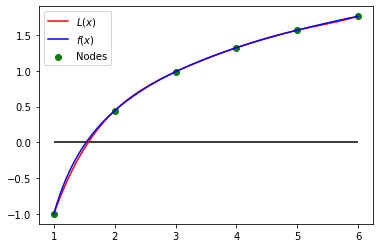

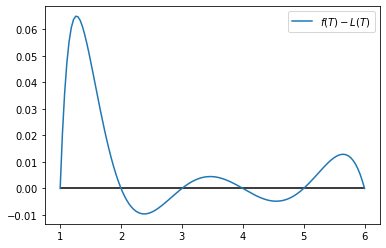

In [8]:
analyze_interpolation(N[0], nodes = create_nodes(N[0])) # 5

0.004022009209811439

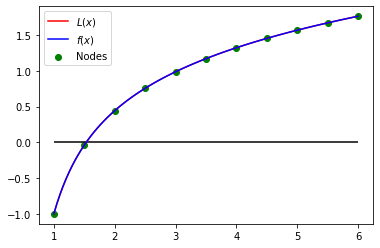

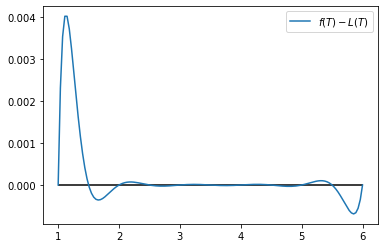

In [9]:
analyze_interpolation(N[1], nodes = create_nodes(N[1])) # 10

0.0002732123427824362

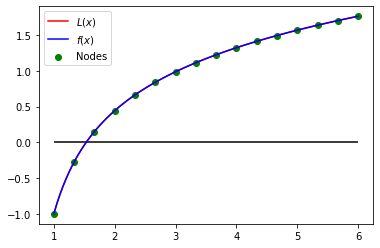

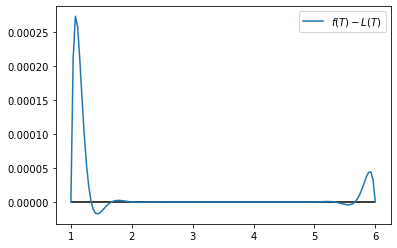

In [10]:
analyze_interpolation(N[2], nodes = create_nodes(N[2])) # 15

1.8232289758501885e-05

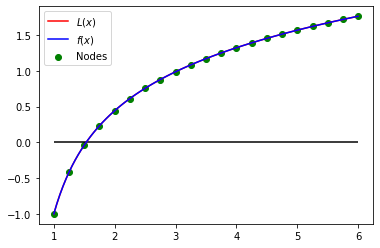

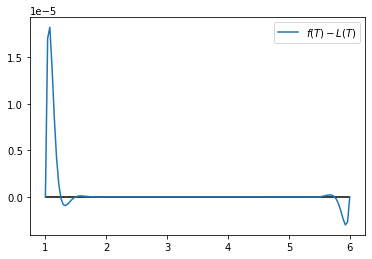

In [11]:
analyze_interpolation(N[3], nodes = create_nodes(N[3])) # 20

1.270193331293079e-06

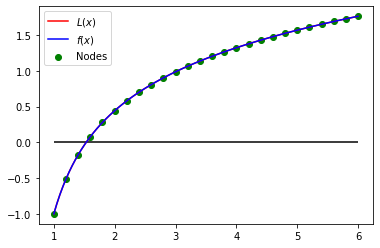

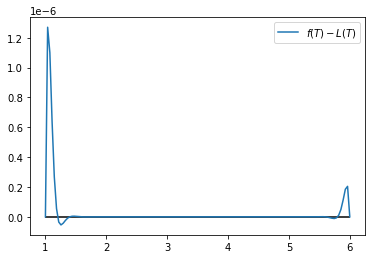

In [12]:
analyze_interpolation(N[4], nodes = create_nodes(N[4])) # 25

9.057840733017741e-08

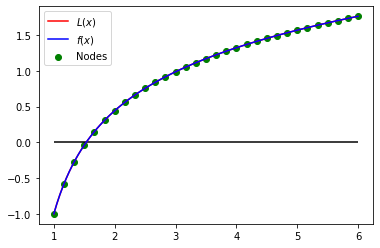

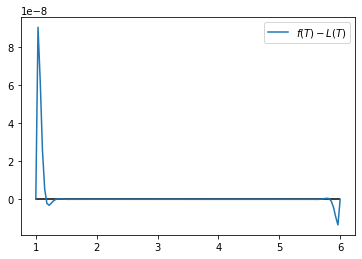

In [13]:
analyze_interpolation(N[5], nodes = create_nodes(N[5])) # 30

6.384551305416153e-07

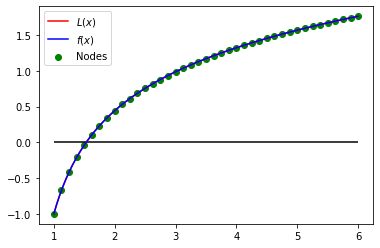

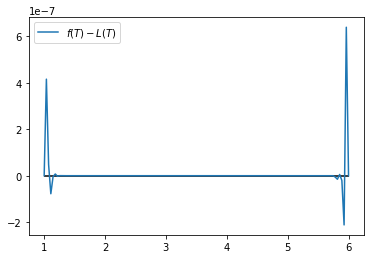

In [14]:
analyze_interpolation(N[6], nodes = create_nodes(N[6])) # 40

0.00051572326749727

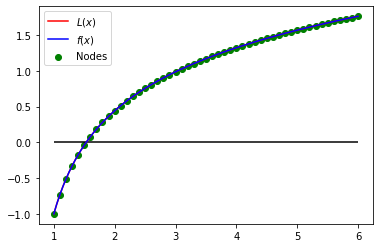

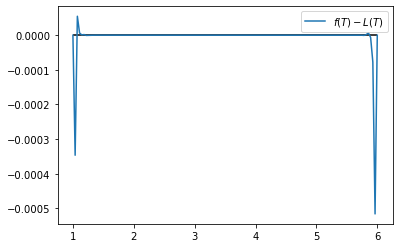

In [15]:
analyze_interpolation(N[7], nodes = create_nodes(N[7])) # 50

0.0649895049117567

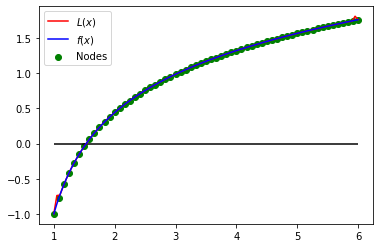

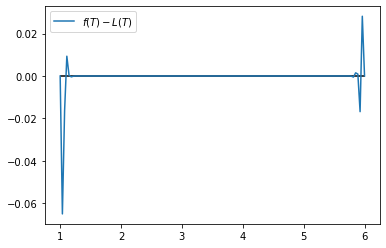

In [16]:
analyze_interpolation(N[8], nodes = create_nodes(N[8])) # 60

In [17]:
equidistant_nodes_err = [analyze_interpolation(i, nodes = create_nodes(i), plot_data = False) for i in N]
# Все маскимальные абсолютные погрешности равноотстоющих узлов

In [18]:
def create_cheb_nodes(n, a = 1, b = 6):
    v = np.asarray([np.cos(np.pi * (1 + 2 * i) / (2 * (n + 1))) for i in range(n + 1)])
    return (a + b) / 2 + v * (b - a) / 2 

0.04191228530230118

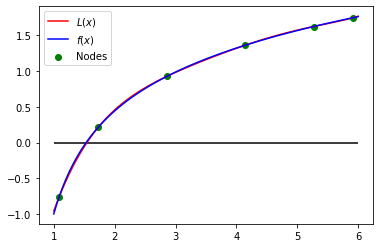

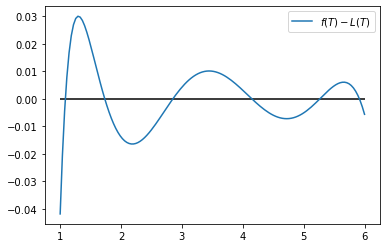

In [19]:
analyze_interpolation(N[0], nodes = create_cheb_nodes(N[0]))

0.0008216496132842366

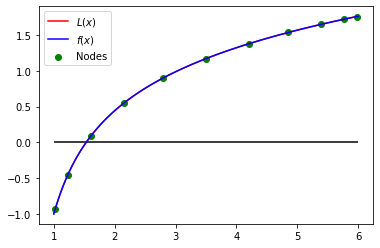

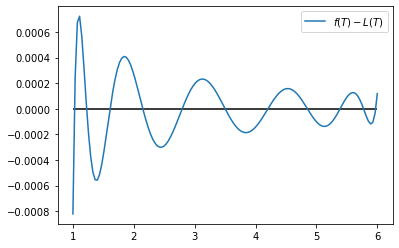

In [20]:
analyze_interpolation(N[1], nodes = create_cheb_nodes(N[1]))

1.450641706779443e-05

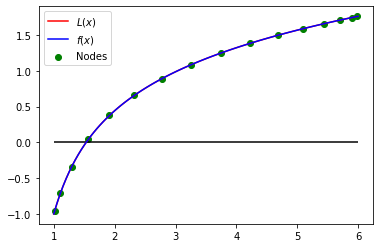

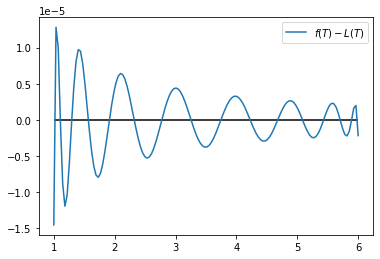

In [21]:
analyze_interpolation(N[2], nodes = create_cheb_nodes(N[2]))

2.3976448293439034e-07

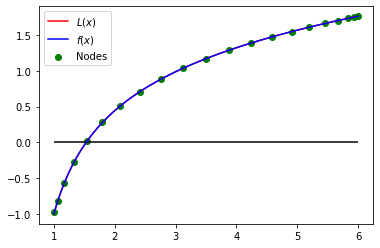

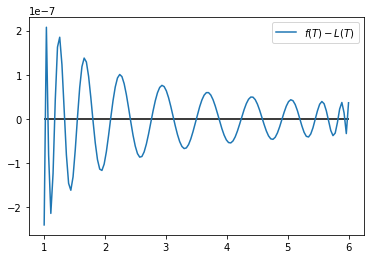

In [22]:
analyze_interpolation(N[3], nodes = create_cheb_nodes(N[3]))

3.796462921812349e-09

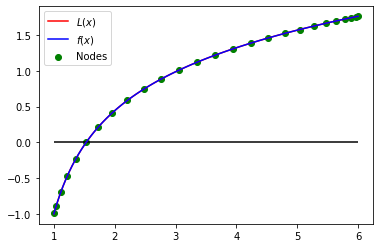

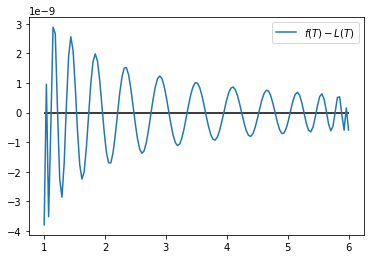

In [23]:
analyze_interpolation(N[4], nodes = create_cheb_nodes(N[4]))

5.835021354982928e-11

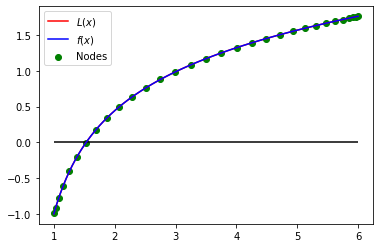

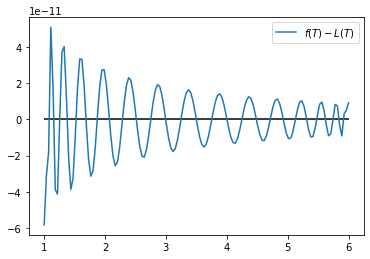

In [24]:
analyze_interpolation(N[5], nodes = create_cheb_nodes(N[5]))

1.3211653993039363e-14

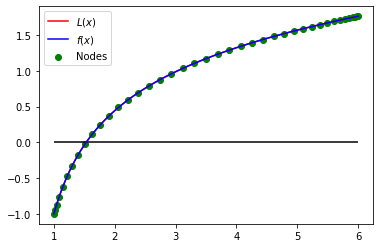

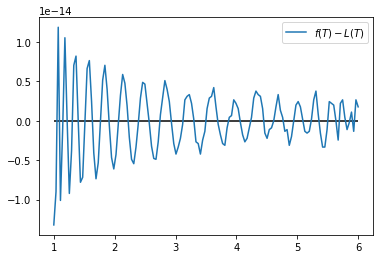

In [25]:
analyze_interpolation(N[6], nodes = create_cheb_nodes(N[6]))

2.6645352591003757e-15

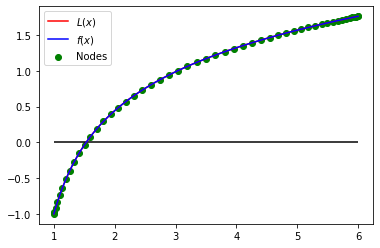

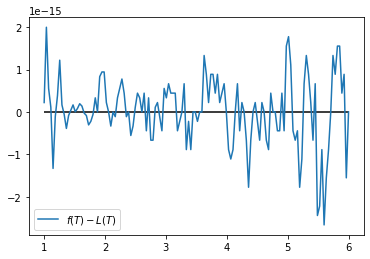

In [26]:
analyze_interpolation(N[7], nodes = create_cheb_nodes(N[7]))

3.9968028886505635e-15

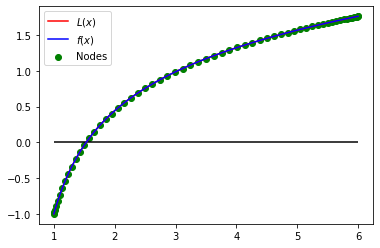

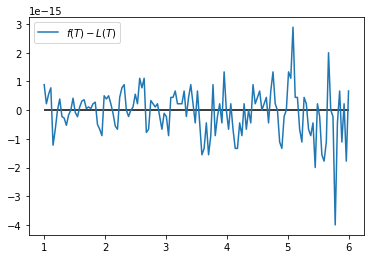

In [27]:
analyze_interpolation(N[8], nodes = create_cheb_nodes(N[8]))

In [28]:
equidistant_cheb_nodes_err = [analyze_interpolation(i, nodes = create_cheb_nodes(i), plot_data = False) for i in N]
# Все маскимальные абсолютные погрешности равноотстоющих узлов

In [29]:
equidistant_nodes_err, equidistant_cheb_nodes_err

([0.06488233979943503,
  0.004022009209811439,
  0.0002732123427824362,
  1.8232289758501885e-05,
  1.270193331293079e-06,
  9.057840733017741e-08,
  6.384551305416153e-07,
  0.00051572326749727,
  0.0649895049117567],
 [0.04191228530230118,
  0.0008216496132842366,
  1.450641706779443e-05,
  2.3976448293439034e-07,
  3.796462921812349e-09,
  5.835021354982928e-11,
  1.3211653993039363e-14,
  2.6645352591003757e-15,
  3.9968028886505635e-15])

Text(0.5, 1.0, 'Max. abs. error')

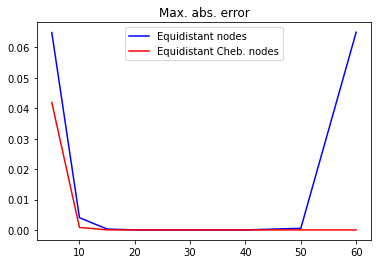

In [30]:
plt.plot(N, equidistant_nodes_err, color = 'blue', label = r'Equidistant nodes')
plt.plot(N, equidistant_cheb_nodes_err, color = 'red', label = r'Equidistant Cheb. nodes')
plt.legend()
plt.title('Max. abs. error')

In [31]:
# Вывод: при достаточно большом количестве равноотставленных узлов максимальная абсолютная 
# погрешность увеличивается, в отличие от полинома с узлами Чебышева

In [32]:
def linear_spline_interp(n, nodes, plot_data = True):
    spl = UnivariateSpline(nodes, f(nodes))
    if plot_data:
        plt.figure(0)
        plt.plot(nodes, spl(nodes), color = 'blue', label = 'Spline')
        plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), color = 'red', label = r'$f(x)$')
        plt.hlines(0, a, b, color = 'black')
        plt.legend()
        plt.title('Spline and actual curve')
    return np.max(np.abs(f(T) - spl(T)))
        
    

In [33]:
equidistant_nodes_spline_err = [linear_spline_interp(i, create_nodes(i), plot_data = False) for i in N]

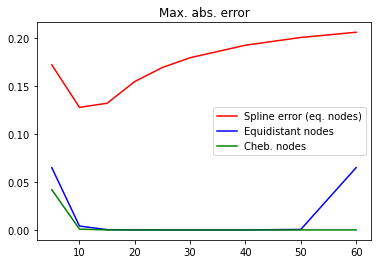

In [34]:
plt.plot(N, equidistant_nodes_spline_err, color = 'red', label = 'Spline error (eq. nodes)')
plt.legend()
plt.title('Spline max. abs. error')
plt.plot(N, equidistant_nodes_err, color = 'blue', label = r'Equidistant nodes')
plt.plot(N, equidistant_cheb_nodes_err, color = 'green', label = r'Cheb. nodes')
plt.title('Max. abs. error')
plt.legend()

In [35]:
%%latex
Вывод: Линейная интерполяция сплайном не явяется методом точной аппроксимации графика функции и достигает минимальной погрешности при сравнительно
небольшом количестве узлов. Самый стабильный метод аппроксимации, судя по графику - полином Лагранжа с узловыми точками Чебышева,
который стабилен даже при большом количестве узловых точек. 

<IPython.core.display.Latex object>